1 - when  we making parelle chain make sure we update th thinks partially not properly or whole change the state when we returning 

In [ ]:
import os
from typing_extensions import TypedDict
from dotenv import load_dotenv



from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()
gemini_api_key = os.getenv("GEMINI")


llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", api_key=gemini_api_key)


In [15]:
class BlogPostState(TypedDict):
    """
    Represents the state of the work flows.
    Each node will update one of these fields.
    """
    Topic: str
    Title: str
    Outline: str
    Content: str
    


In [ ]:
def outline_generator(state: BlogPostState) -> BlogPostState:
    """
    Generates a blog outline based on the topic.
    This function must return the updated state dictionary.
    """
    topic = state['Topic']
    prompt = f"Generate a detailed outline for a blog post about {topic}."
    

    outline = llm.invoke(prompt).content
    
    return {"Outline":outline}

def title_generator(state: BlogPostState) -> BlogPostState:
    """
    Generates a blog title based on the topic.
    This function must return the updated state dictionary.
    """
    topic = state["Topic"]
    prompt = f"Generate a catchy, SEO friendly blog post title about the topic: {topic}."
    

    title = llm.invoke(prompt).content
    
    return {"Title": title}

def content_generator(state: BlogPostState) -> BlogPostState:
    """
    Generates the blog content based on the title and outline.
    This function must return the updated state dictionary.
    """
    title = state["Title"]
    outline = state["Outline"]
    

    prompt = f"Generate the content for a blog post with the title '{title}' and the following outline:\n\n{outline}"
    content= llm.invoke(prompt).content
    
    return {"Content":content}

In [ ]:




graph = StateGraph(BlogPostState)

# Add the nodes that perform each step
graph.add_node("title", title_generator)
graph.add_node("outline", outline_generator)
graph.add_node("content", content_generator)


graph.add_edge(START, "title")
graph.add_edge(START, "outline")


graph.add_edge("title", "content")
graph.add_edge("outline", "content")


graph.add_edge("content", END)


workflow = graph.compile()


initial_state = {
    "Topic": "future of Ai in Hospitals", 
    "Title": "",
    "Outline": "",
    "Content": "",
}


final_state = workflow.invoke(initial_state)
print(final_state)

{'Topic': 'future of Ai in Hospitals', 'Title': 'Okay, here are a few catchy and SEO-friendly blog post titles about the future of AI in hospitals, designed to attract readers and rank well in search results:\n\n**Short & Punchy:**\n\n*   **AI in Hospitals: The Future is Now?**\n*   **Hospitals of Tomorrow: Powered by AI**\n*   **AI & Healthcare: A Vital Prescription for the Future**\n\n**More Descriptive & Benefit-Oriented:**\n\n*   **The AI Revolution in Hospitals: Better Care, Faster Results**\n*   **Future-Proofing Hospitals: How AI is Transforming Healthcare**\n*   **AI in Hospitals: How Artificial Intelligence is Saving Lives and Streamlining Care**\n*   **Beyond the Scalpel: AI\'s Impact on the Future of Hospital Care**\n\n**Question-Based (Intriguing):**\n\n*   **Will AI Replace Doctors? The Future of AI in Hospitals**\n*   **AI in Hospitals: What\'s Next for Patient Care?**\n*   **Can AI Solve Healthcare\'s Biggest Challenges? The Hospital of the Future**\n\n**Specific & Keywo

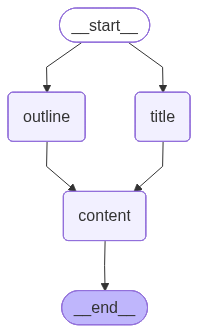

In [20]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png()) 